# Prediction of House price based on various factors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# import libraries
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score

In [3]:
df=pd.read_csv(r'C:\Users\user\OneDrive\Desktop\Datasets\kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Data Wrangling

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.drop(['id','date'],axis=1,inplace = True)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

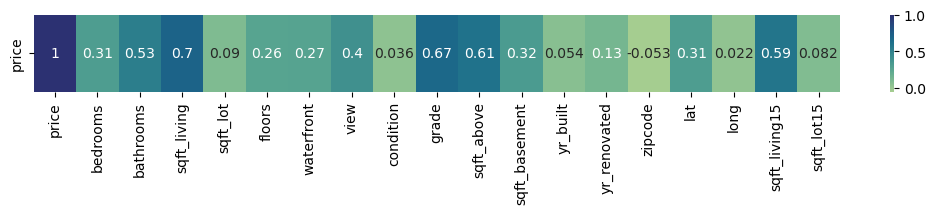

In [7]:
df.corr()
plt.figure(figsize=(13,1))
sns.heatmap(df.corr().loc[['price'],:],annot= True, cmap='crest')
plt.show()

# here, we consider only those parameters whose correlation values are >=0.5. since 0.7 to 0.9 indicates high correlation and 0.5 to 0.7 indicates moderate correlation.we shall remove variables: bedrooms,sqft_loft,waterfront,view,condition,sqft_basemen,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15.

In [8]:
df.pop('floors')
df.pop('sqft_lot')
df.pop('waterfront')
df.pop('view')
df.pop('condition')
df.pop('sqft_basement')
df.pop('yr_built')
df.pop('yr_renovated')
df.pop('zipcode')
df.pop('lat')
df.pop('long')
df.pop("sqft_lot15")

0        5650
1        7639
2        8062
3        5000
4        7503
         ... 
21608    1509
21609    7200
21610    2007
21611    1287
21612    1357
Name: sqft_lot15, Length: 21613, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   grade          21613 non-null  int64  
 4   sqft_above     21613 non-null  int64  
 5   sqft_living15  21613 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1013.2 KB


In [38]:
df.corr()

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
price,1.000000,0.525138,0.702035,0.667434,0.605567,0.585379
bathrooms,0.525138,1.000000,0.754665,0.664983,0.685342,0.568634
sqft_living,0.702035,0.754665,1.000000,0.762704,0.876597,0.756420
grade,0.667434,0.664983,0.762704,1.000000,0.755923,0.713202
sqft_above,0.605567,0.685342,0.876597,0.755923,1.000000,0.731870
sqft_living15,0.585379,0.568634,0.756420,0.713202,0.731870,1.000000


# Multiple Regression model
- y(house price)= a + b0 * x1 (bathrooms) + b1 * x2 (sqft_living) +b2 * x3(grade) +b3 * x4(sqft_above) +b4 * x5(sqft_living15) 


- 5 variables are only considered based on their correlation values


In [26]:
# set the variables
X=df[['bathrooms','sqft_living','grade','sqft_above','sqft_living15']]
y=df['price']

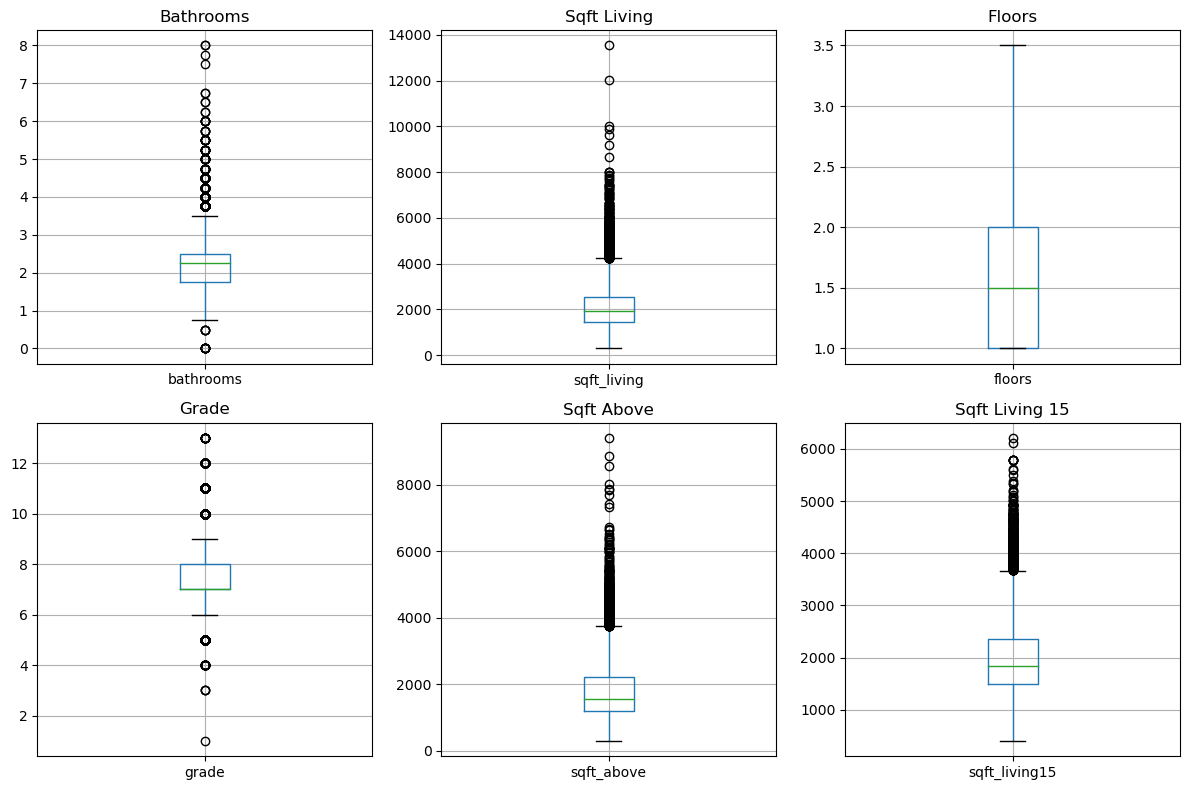

In [35]:
#check for the outliers
fig,ax=plt.subplots(2,3,figsize=(12,8))
df.boxplot('bathrooms', ax=ax[0, 0])
ax[0, 0].set_title('Bathrooms')
df.boxplot('sqft_living', ax=ax[0, 1])
ax[0, 1].set_title('Sqft Living')
df.boxplot('floors', ax=ax[0, 2])
ax[0, 2].set_title('Floors')
df.boxplot('grade', ax=ax[1, 0])
ax[1, 0].set_title('Grade')
df.boxplot('sqft_above', ax=ax[1, 1])
ax[1, 1].set_title('Sqft Above')
df.boxplot('sqft_living15', ax=ax[1, 2])
ax[1, 2].set_title('Sqft Living 15')
plt.tight_layout()
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


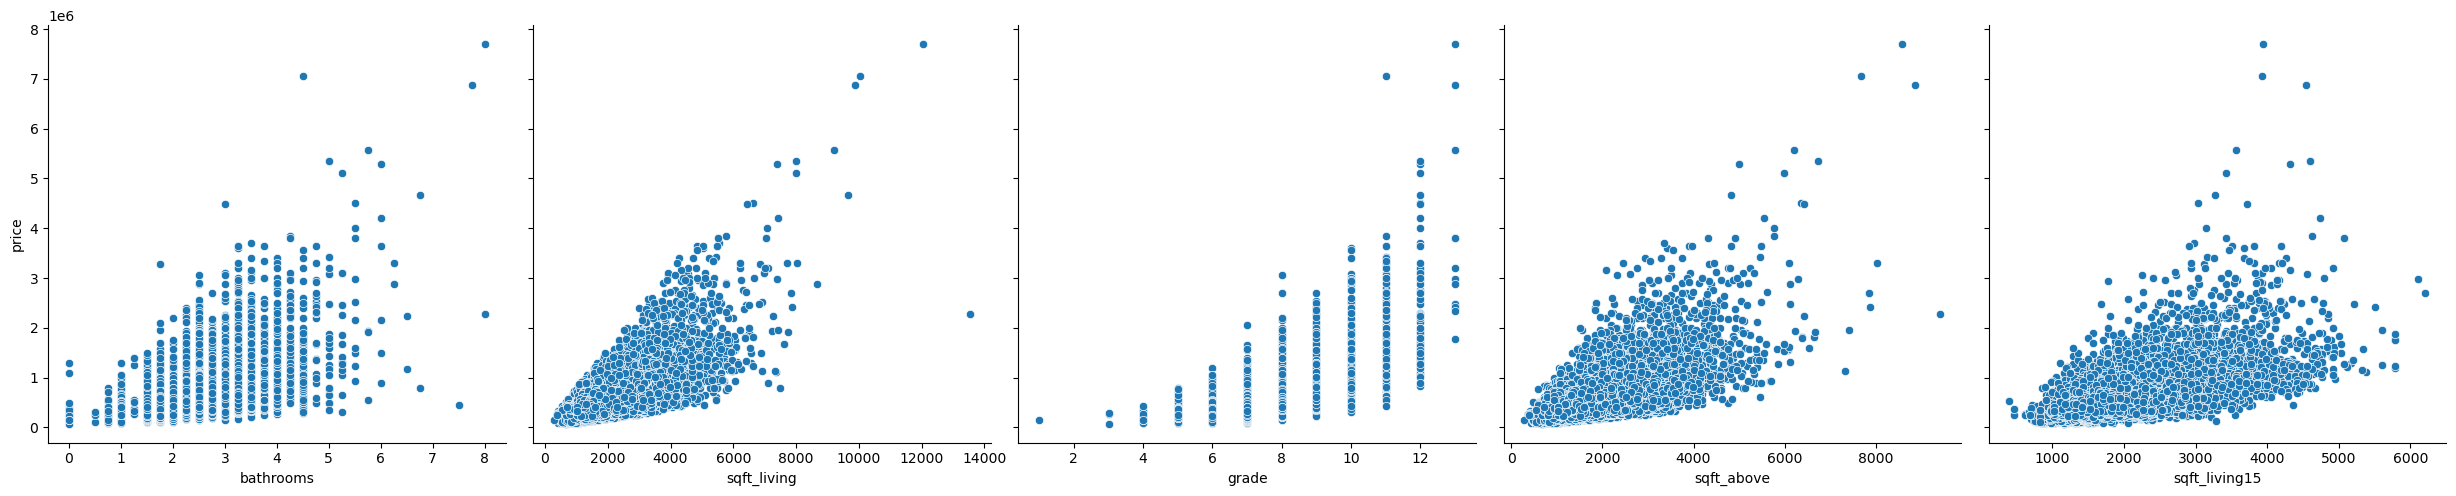

# Setting up the  model

In [16]:
#set the independent and dependent variables
X=df[['bathrooms','sqft_living','grade','sqft_above','sqft_living15']]
y=df[['price']]

In [17]:
#split the data into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)


In [19]:
y_train.shape

(15129, 1)

In [20]:
y_test.shape

(6484, 1)

# Performing multiple linear regression 

In [21]:
#Perform linear regression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
lr.intercept_

array([-654907.01959987])

In [23]:
lr.coef_

array([[-3.60550683e+04,  2.33281206e+02,  1.14034933e+05,
        -7.68734543e+01,  2.42808475e+01]])

In [24]:
list(zip(X,lr.coef_))

[('bathrooms',
  array([-3.60550683e+04,  2.33281206e+02,  1.14034933e+05, -7.68734543e+01,
          2.42808475e+01]))]

In [32]:
y_pred=lr.predict(X_test)
x_pred=lr.predict(X_train)

In [37]:
y_pred.shape

(6484, 1)

In [29]:
y_test.shape

(6484, 1)

In [33]:
x_pred.shape

(15129, 1)

In [35]:
X_test.shape

(6484, 5)

In [36]:
X_train.shape

(15129, 5)

# Plotting and Visualizing the actual and predicted values

Text(0, 0.5, 'Price')

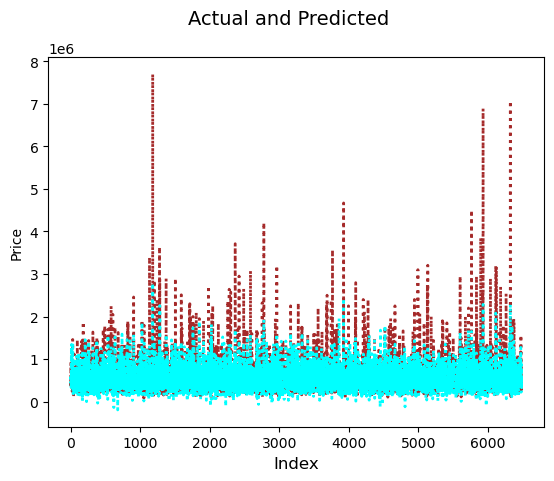

In [38]:
c=[i for i in range(1,6485,1)] # for generaing index numbers
fig=plt.figure()
plt.plot(c,y_test,color='brown',linewidth=2,linestyle=":")
plt.plot(c,y_pred,color='cyan',linewidth=2,linestyle=':')
fig.suptitle("Actual and Predicted",fontsize=14)
plt.xlabel('Index',fontsize=12)
plt.ylabel('Price')

Text(0, 0.5, 'ytest-ypred')

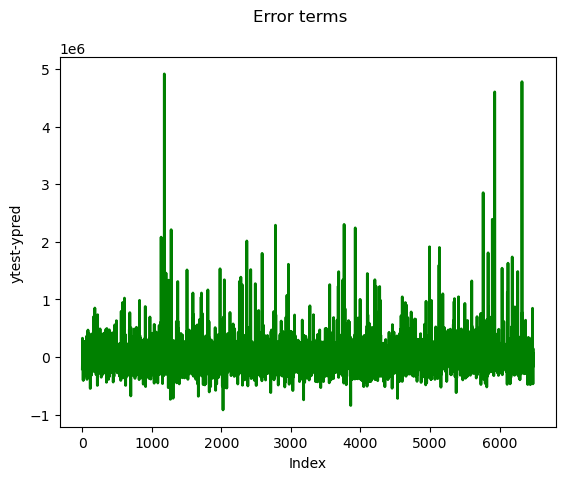

In [39]:
#Error terms
c=[i for i in range(1,6485,1)]
fig=plt.figure()
plt.plot(c,y_test-y_pred,color='green',linewidth=2,linestyle='-')
fig.suptitle('Error terms',fontsize=12)
plt.xlabel('Index',fontsize=10)
plt.ylabel('ytest-ypred',fontsize=10)

# Evaluation Metrics

In [40]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mse)
print(mae)
print(r2)

68739234228.35106
161373.7581314192
0.5321068396758138
